# Исследование объявлений о продаже квартир в Санкт-Петербурге

<b> Задача </b>: исследовать данные и определить рыночную стоимость объектов недвижимости

<b> Входные данные:</b> данные сервиса Яндекс. Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<b> Итоговый вывод </b> : Был выполнен анализ данных и сделаны следующие выводы:

- намного больше квартир с небольшой площадью, чем с большой. Среднее значение площади 60 квадратных метров. 50% значений площади располагаются между 40 и 69 м^2
- среднее значение жилой площади 34 м^2, 50% значений площади располагаются между 18,6 и 42,3 м^2
- среднее значение площади кухни 10 квадратных метров.50% значений площади располагаются между 7 и 12 м^2.
- медианное значение цены 4650000, а среднее 6541744. 50 % значений находятся между значениями 3400000 и 6800000
- больше всего объявлений с 1 и 2 комнатными квартирами.
- больше всего объявлений о продаже квартир на 4 этаже. 50 % значений лежат между 2 и 8. Чем выше этаж, тем меньше объявлений о продаже.
- меньше всего объявлений о продаже квартир на последнем этаже, на первом продается ~12 %. В основном квартиры продаются между 1 и последним этажами.
- среднее значение расстояния от центра порядка 13 км. 50% значений находятся между ~9 b и ~16 километрами.
- среднее значение расстояния до ближайшего аэропорта порядка 28 км. 50% значений лежат между ~18,5 И ~37,3 км.
- среднее значение расстояния до ближайшего парка 490 метров. 50% значений находятся между ~288 и ~612 метрами. У большинства квартир в радиусе 3 км есть хотя бы 1 парк. 
- большинство объявлений публикуют в середине недели - в среду, меньше всего на выходных. Большинство объявлений публикуют после Нового года - в феврале, далее количество объявлений уменьшается (меньше всего в мае). Начиная с июня, вновь наблюдается рост публикаций.
- самое популярное значение количества дней, сколько было размещено каждое объявление, - 95, то есть порядка 3 месяцев. Минимально - 1 день (вероятно либо очень выгодное предложение, на которое было много откликов, либо продавец сам его снял с публикации), максимальное значение - 1580 дней (~4,3 года). 50% значений лежат между 45 днями и 232 днями. Меньше 45 дней - быстрые продажи, больше 232 дней - долгие продажи.
- линейная зависимость между ценой и другими параметрами не обнаружена.
- средняя цена на квартиры на первом этаже ниже чем на других. Средняя и медианная цена квартир на последнем этаже немного ниже чем на других этажах. Это соответствует действительности, так как квартиры на первых этажах имеют ряд недостатков и оттого хуже покупаются
- самые высокие цены на квартиры в апреле, вероятно это связано с наибольшим спросом. Самая наименьшая цена в июне. Выгодней всего искать квартиры в июне.
- самые высокие цены были в 2014 году, затем они стали снижаться. После 2017 года цены стали вновь расти.
- 10 мест, в которых наибольшее число объявлений о продаже квартир:  'Выборг', 'Всеволожск', 'Гатчина', 'Колпино', 'поселок Шушары','поселок Мурино', 'поселок Парголово', 'деревня Кудрово', 'Пушкин','Санкт-Петербург'
Из них: в Выборге самая маленькая цена квардратного метра, а в Санкт-Питербурге самая высокая цена квадратного метра (соответствует реальности). 
- чем меньше расстояние до центра, тем выше цены, что логично. Дальше 7 км от центра цены заметно снижаются.

In [1]:
import pandas as pd
import re

In [2]:
#data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data = pd.read_csv('real_estate_data.csv', sep='\t')

In [3]:
pd.set_option('display.max_columns', data.shape[1])
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


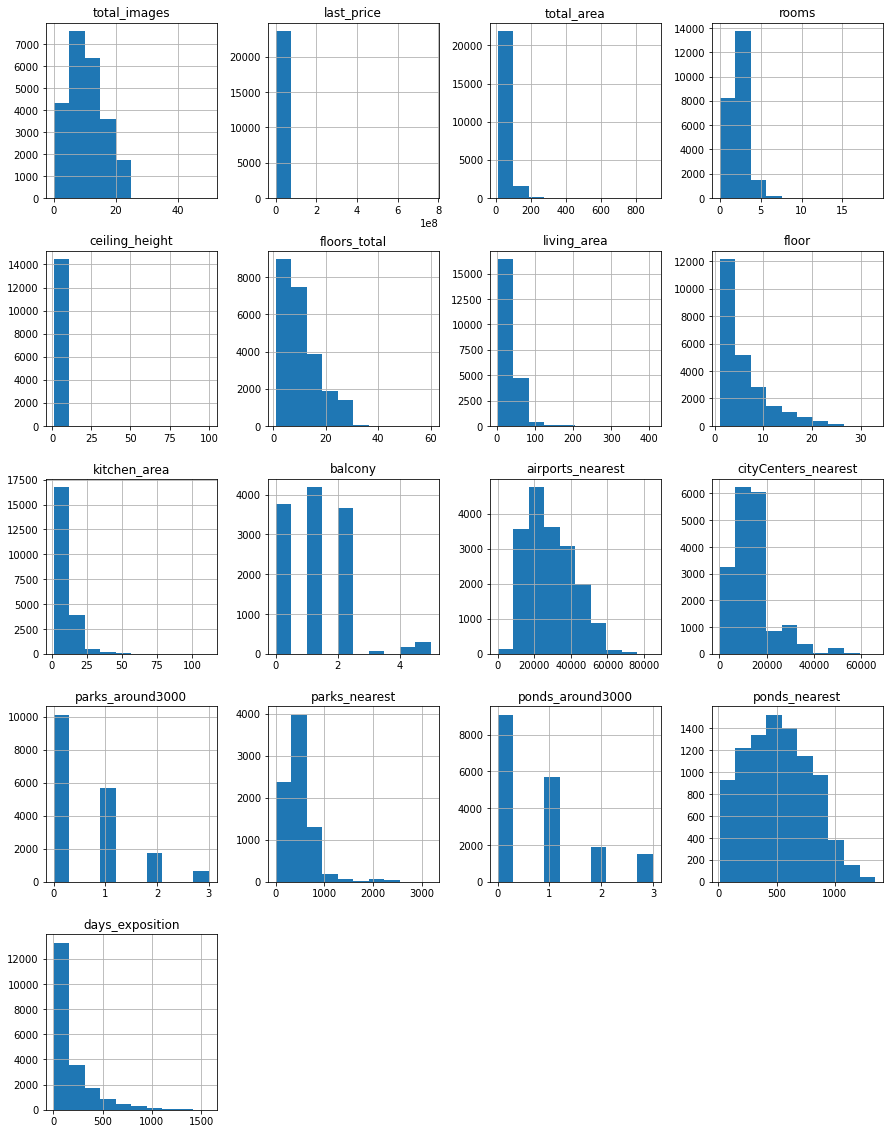

In [4]:
data.hist(figsize=(15, 20));

In [5]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

<b> Квартиры с площадью ~200 квадратных метров и более выглядят как выбросы.
Множество значений около 0 в колонке с высотой потолков. Необходимо рассмотреть, при том, 
что стандартная высота составляет около 3 метров.
также необходимо провести анализ столбцов на предмет типа данных: is_apartment (д.б. bool), balcony(д.б. bool). 
Тип данных float64 также может свидетельствовать о наличии NaN.Необходимо рассмотреть тип данных object.
В названии местности могут быть дубликаты - столбец locality_name.
</b>

### Предобработка данных

Найдем столбцы, в которых есть пропуски

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Итак, выше выведены суммы пропусков в каждом столбце

Рассмотрим столбец is_apartment

In [7]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

<b> Вероятно, если напротив стоблца не стоит True, то это - не апартементы. Заменим все пропуски на False. </b>

In [8]:
data.fillna(value={'is_apartment':False}, inplace=True)

In [9]:
data[data['is_apartment'].isna()]['is_apartment']

Series([], Name: is_apartment, dtype: bool)

<b> Рассмотрим столбец balcony </b>

In [10]:
data['balcony'].isna().sum()

11519

<b> Вероятно, если значение пропущено, то балкона нет. Заменим все NaN на 0. </b>

In [11]:
data.fillna(value={'balcony':0}, inplace=True)

In [12]:
data['balcony'].isna().sum()

0

<b> Рассмотрим столбец floors_total </b>

In [13]:
data['floors_total'].isna().sum()

86

In [14]:
data['floors_total'].value_counts()

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
34.0       1
60.0       1
29.0       1
33.0       1
52.0       1
37.0       1
Name: floors_total, dtype: int64

<b> Вероятно, значения в столбце не заполнены, так как в доме 1 этаж. Заполним пропуски значением 1. </b>

In [15]:
data.fillna(value={'floors_total':1}, inplace=True)

In [16]:
data['floors_total'].isna().sum()

0

<b> Рассмотрим ceiling_height (высота потолков (м)) </b>

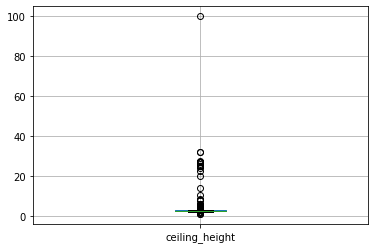

In [17]:
data.boxplot(column='ceiling_height');

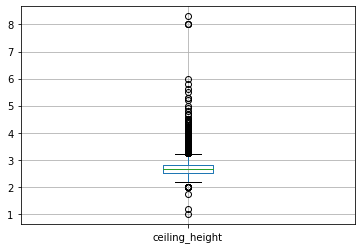

In [18]:
data.query('ceiling_height <10').boxplot(column='ceiling_height');

In [19]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [20]:
data['ceiling_height'].median()

2.65

In [21]:
data['ceiling_height'].isna().sum()

9195

<b> Итак, Пропуски в столбце ceiling_height могут быть связаны с тем, что высота потолков является стандартной ~3 метров. Заполним пропуски медианным значением. </b>

In [22]:
data.fillna(value={'ceiling_height':data['ceiling_height'].median()}, inplace=True)

In [23]:
data['ceiling_height'].isna().sum()

0

<b> Рассмотрим столбцы parks_around3000 и parks_nearest. Если одновременно есть пропуски в этих столбцах, то логично предположить, что парков в радиусе 3 км нет, поэтому заполним эти значения нулем. </b>

In [24]:
data['parks_around3000'].value_counts()

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

In [25]:
condition_1 = data['parks_around3000'].isna()
condition_2 = data['parks_nearest'].isna()

In [26]:
idx = data[condition_1 & condition_2].index.tolist()

In [27]:
data.loc[idx, 'parks_around3000'] = 0

In [28]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<b> Итак, мы видим, что все пропущенные значения в столбце parks_around3000 заменились на 0. То есть предположение, что значения одновременно не указаны в parks_around3000 и parks_nearest говорят о том, что парков в радиусе 3 км нет, верно. </b>

<b> Рассмотрим столбцы ponds_around3000 и ponds_nearest. Если одновременно есть пропуски в этих столбцах, то логично предположить, что водоемов в радиусе 3 км нет, поэтому заполним эти значения нулем. </b>

In [29]:
data['ponds_around3000'].value_counts()

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

In [30]:
condition_1 = data['ponds_around3000'].isna()
condition_2 = data['ponds_nearest'].isna()

In [31]:
idx = data[condition_1 & condition_2].index.tolist()

In [32]:
data.loc[idx, 'ponds_around3000'] = 0

In [33]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

<b> Причины пропусков в данных:
1. Стобец living_area является важнейшим, так как напрямую влияет на цену. Пропуск в этом столбце скорее всего возник из-за каких-то проблем на этапе выгрузки.
2. Пропуск в столбце kitchen_area может быть связан с тем, что человек не посчитал важным указывать отдельно площадь кухни или этот пропуск возник на этапе выгрузки данных.
3. Пропуск в столбце locality_name может быть связан с тем, что человек не посчитал важным указывать район (населенный пункт) или этот пропуск возник на этапе выгрузки данных.
4. Пропуски в столбцах airports_nearest, cityCenters_neares человек мог не заполнить из-за того, что посчитал эту информацию несущественной или из-за того, что не обладает данной информацией. Также есть вероятность пропуска из за некорректной выгрузки.
5. Пропуски в parks_nearest и ponds_nearest могут быть связаны с тем, что парки находятся далеко и в радиусе 3 км нет ни одного парка, или, например, человек посчитал данную информацию несущественной или из-за того, что не обладает данной информацией. Также учитываем причину возникновения пропуска на этапе выгрузки.
6. Пропуски в days_exposition могут говорить о некорректной выгрузке, а также о том, что в момент выгрузки это объявление является актуальным. </b>

<b> Рассмотрим типы данных в каждом столбце </b>

In [34]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [35]:
data['floors_total'].isna().sum()

0

<b> Изменим тип данных в floors_total на int, так как количество этажей - это целое число </b>

In [36]:
data['floors_total'] = data.astype({'floors_total':'int'})['floors_total']

In [37]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total              int32
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

<b> Изменим тип колонки balcony на int, так как количество балконов - это порядковое числительное.</b>

In [38]:
data['balcony'] = data['balcony'].astype('int')

In [39]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total              int32
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                   int32
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

<b> Изменим тип колонок parks_around3000 и ponds_around3000 на int, так как количество водоемов и парков - это порядковые числительные.</b

In [40]:
data['parks_around3000'] = data['parks_around3000'].astype('int')

In [41]:
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

In [42]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total              int32
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                   int32
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000          int32
parks_nearest           float64
ponds_around3000          int32
ponds_nearest           float64
days_exposition         float64
dtype: object

<b> Изучим столбец locality_name на предмет дубликатов </b>

<b> Заполним NaN в колонке 'locality_name' пустыми строками </b>

In [43]:
data['locality_name'].isna().sum()

49

In [44]:
data['locality_name'] = data['locality_name'].fillna('')

In [45]:
data['locality_name'].isna().sum()

0

In [46]:
def create_loc_list(data):
    loc_list = []
    for i in data['locality_name'].unique():
        if len(i) == 0:
            continue
        location = i.split()
        capit_word = [j for j in i.split() if j.istitle()][0]
        loc_list.append(i[i.find(capit_word):])
    
    return list(set(loc_list))

In [47]:
loc_names_list = data['locality_name'].unique().tolist()

In [48]:
loc_list = create_loc_list(data)

In [49]:
loc_list[:5]

['Новый Свет', 'Большое Рейзино', 'Ялгино', 'Светогорск', 'Кузьмолово']

In [50]:
def find_notexplicit_dupls(loc_list, loc_names_list):
    for i in loc_list:
        d = [j for j in loc_names_list if i in j]
        if len(d) > 1:
            print(d)
        
    

In [51]:
find_notexplicit_dupls(loc_list, loc_names_list)

['посёлок Новый Свет', 'поселок Новый Свет']
['поселок городского типа Рощино', 'посёлок городского типа Рощино', 'городской посёлок Рощино']
['посёлок Тельмана', 'поселок Тельмана']
['Кингисепп', 'поселок Кингисеппский']
['поселок Терволово', 'посёлок Терволово']
['поселок Лесное', 'коттеджный посёлок Лесное']
['деревня Бегуницы', 'деревня Старые Бегуницы']
['поселок Мельниково', 'посёлок Мельниково']
['посёлок Аннино', 'поселок Аннино']
['посёлок Щеглово', 'деревня Щеглово']
['поселок городского типа Советский', 'городской посёлок Советский']
['посёлок Пансионат Зелёный Бор', 'поселок Пансионат Зелёный Бор']
['поселок Ильичёво', 'посёлок Ильичёво']
['городской посёлок Мга', 'посёлок городского типа Мга']
['поселок Стеклянный', 'посёлок Стеклянный']
['село Русско-Высоцкое', 'Высоцк']
['Любань', 'поселок Любань']
['поселок городского типа Приладожский', 'садовое товарищество Приладожский']
['садовое товарищество Новая Ропша', 'посёлок Ропша']
['поселок Перово', 'посёлок Перово']
['посё

<b> Итак, мы видим множество неявных дубликатов по причине написания одних и тех же слов черех "е" и "ё". Заменим "посёлок" на "поселок" </b>

In [52]:
data['locality_name'] = data['locality_name'].apply(lambda x: re.sub('посёлок', 'поселок', x))

In [53]:
loc_names_list = data['locality_name'].unique().tolist()
loc_list = create_loc_list(data)
find_notexplicit_dupls(loc_list, loc_names_list)

['поселок городского типа Рощино', 'городской поселок Рощино']
['Кингисепп', 'поселок Кингисеппский']
['поселок Лесное', 'коттеджный поселок Лесное']
['деревня Бегуницы', 'деревня Старые Бегуницы']
['поселок Щеглово', 'деревня Щеглово']
['поселок городского типа Советский', 'городской поселок Советский']
['городской поселок Мга', 'поселок городского типа Мга']
['село Русско-Высоцкое', 'Высоцк']
['Любань', 'поселок Любань']
['поселок городского типа Приладожский', 'садовое товарищество Приладожский']
['садовое товарищество Новая Ропша', 'поселок Ропша']
['поселок городского типа Рахья', 'садовое товарищество Рахья']
['поселок станции Вещево', 'поселок при железнодорожной станции Вещево']
['городской поселок Большая Ижора', 'поселок городского типа Большая Ижора']
['поселок Романовка', 'деревня Малая Романовка']
['поселок Рябово', 'поселок городского типа Рябово']
['деревня Калитино', 'поселок Калитино']
['деревня Рабитицы', 'поселок Рабитицы']
['городской поселок Лесогорский', 'поселок 

<b> Итак, неявные дубликаты:
['поселок городского типа Рощино', 'городской поселок Рощино']
['городской поселок Большая Ижора', 'поселок городского типа Большая Ижора']
['поселок Лесное', 'коттеджный поселок Лесное']
['поселок Рябово', 'поселок городского типа Рябово']
['село Павлово', 'городской поселок Павлово', 'поселок городского типа Павлово']
['городской поселок Лесогорский', 'поселок городского типа Лесогорский']
['поселок станции Приветнинское', 'поселок при железнодорожной станции Приветнинское']
['поселок городского типа Советский', 'городской поселок Советский']
['поселок станции Вещево', 'поселок при железнодорожной станции Вещево']
['поселок станции Громово', 'поселок Громово']
['городской поселок Мга', 'поселок городского типа Мга']
['городской поселок Назия', 'поселок городского типа Назия'] </b>

Заменим "городской поселок" на "поселок городского типа", а также замены из replacement_list

In [54]:
data['locality_name'] = data['locality_name'].apply(lambda x: re.sub('городской поселок', 'поселок городского типа', x))

In [55]:
loc_names_list = data['locality_name'].unique().tolist()
loc_list = create_loc_list(data)
find_notexplicit_dupls(loc_list, loc_names_list)

['Кингисепп', 'поселок Кингисеппский']
['поселок Лесное', 'коттеджный поселок Лесное']
['деревня Бегуницы', 'деревня Старые Бегуницы']
['поселок Щеглово', 'деревня Щеглово']
['село Русско-Высоцкое', 'Высоцк']
['Любань', 'поселок Любань']
['поселок городского типа Приладожский', 'садовое товарищество Приладожский']
['садовое товарищество Новая Ропша', 'поселок Ропша']
['поселок городского типа Рахья', 'садовое товарищество Рахья']
['поселок станции Вещево', 'поселок при железнодорожной станции Вещево']
['поселок Романовка', 'деревня Малая Романовка']
['поселок Рябово', 'поселок городского типа Рябово']
['деревня Калитино', 'поселок Калитино']
['деревня Рабитицы', 'поселок Рабитицы']
['поселок станции Свирь', 'поселок городского типа Свирьстрой']
['деревня Кудрово', 'Кудрово']
['Коммунар', 'поселок Коммунары']
['поселок станции Приветнинское', 'поселок при железнодорожной станции Приветнинское']
['деревня Старая', 'поселок Старая Малукса', 'село Старая Ладога', 'деревня Старая Пустошь']


Приведем следующие название к единому виду

['поселок Лесное', 'коттеджный поселок Лесное']
['поселок Рябово', 'поселок городского типа Рябово']
['поселок станции Приветнинское', 'поселок при железнодорожной станции Приветнинское']
['поселок станции Вещево', 'поселок при железнодорожной станции Вещево']
['поселок станции Громово', 'поселок Громово']

In [56]:
data['locality_name'].replace({'поселок Лесное':'коттеджный поселок Лесное', 'поселок Рябово':'поселок городского типа Рябово',
                             'поселок станции Приветнинское':'поселок при железнодорожной станции Приветнинское',
                             'поселок станции Вещево':'поселок при железнодорожной станции Вещево',
                             'поселок Громово':'поселок станции Громово'}, inplace=True)

In [57]:
loc_names_list = data['locality_name'].unique().tolist()
loc_list = create_loc_list(data)
find_notexplicit_dupls(loc_list, loc_names_list)

['Кингисепп', 'поселок Кингисеппский']
['деревня Бегуницы', 'деревня Старые Бегуницы']
['поселок Щеглово', 'деревня Щеглово']
['село Русско-Высоцкое', 'Высоцк']
['Любань', 'поселок Любань']
['поселок городского типа Приладожский', 'садовое товарищество Приладожский']
['садовое товарищество Новая Ропша', 'поселок Ропша']
['поселок городского типа Рахья', 'садовое товарищество Рахья']
['поселок Романовка', 'деревня Малая Романовка']
['деревня Калитино', 'поселок Калитино']
['деревня Рабитицы', 'поселок Рабитицы']
['поселок станции Свирь', 'поселок городского типа Свирьстрой']
['деревня Кудрово', 'Кудрово']
['Коммунар', 'поселок Коммунары']
['деревня Старая', 'поселок Старая Малукса', 'село Старая Ладога', 'деревня Старая Пустошь']
['село Павлово', 'поселок городского типа Павлово']
['поселок городского типа Красный Бор', 'Сосновый Бор', 'деревня Чудской Бор', 'деревня Бор', 'деревня Трубников Бор', 'поселок Пансионат Зелёный Бор', 'деревня Борисова Грива']
['деревня Гарболово', 'поселок 

<b> Неявных дубликатов нет </b>

<b> Исследуем столбец ceiling_height </b>

<AxesSubplot:>

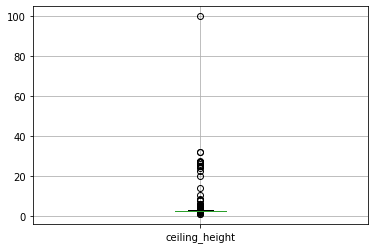

In [58]:
data.boxplot('ceiling_height')

Высота потолков 100 метров выглядит как явный выброс. Избавимся от него, заменив на медианное значение. Также, вероятно, значения больше 20 записаны не в метрах, а в см, поэтому разделим эти значения на 10.

<AxesSubplot:>

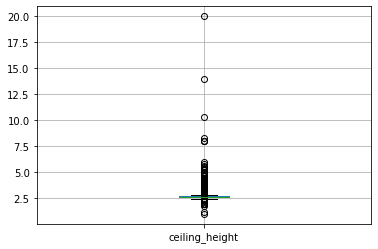

In [59]:
data.query('ceiling_height < 21').boxplot('ceiling_height')

Посмотрим нижние значения

In [60]:
idx = data.query('ceiling_height >= 20').index.tolist()

In [61]:
data.loc[idx, 'ceiling_height'] = data.loc[idx, 'ceiling_height'] / 10

<AxesSubplot:>

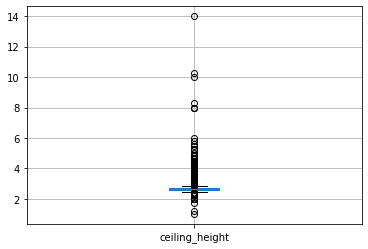

In [62]:
data.boxplot('ceiling_height')

In [63]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.698721
std          0.253208
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

Заменим высоту потолков меньше 2 метров и выше 3 метров медианным значением

In [64]:
median = data['ceiling_height'].median()

In [65]:
idx = data.query('ceiling_height < 2 or ceiling_height > 3').index.tolist()

In [66]:
data.loc[idx, 'ceiling_height'] = median

Посмотрим распределение 

<AxesSubplot:>

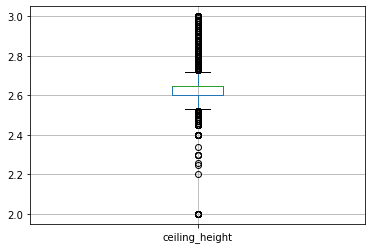

In [67]:
data.boxplot('ceiling_height')

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

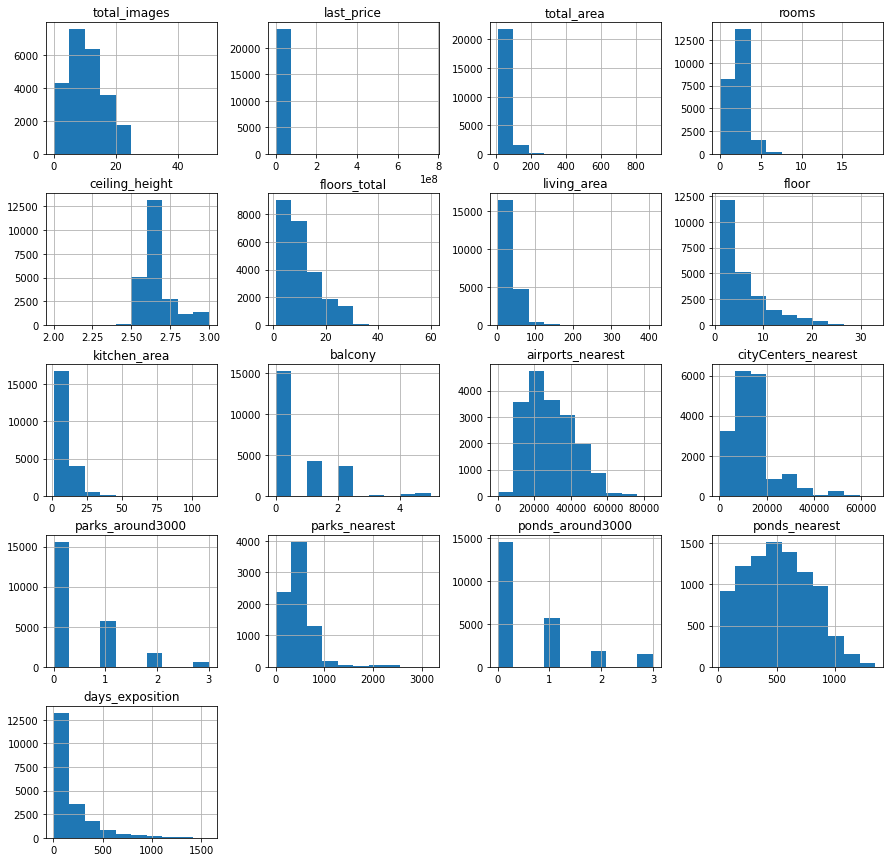

In [68]:
data.hist(figsize=(15, 15))

Рассмотрим столбец last_price

<AxesSubplot:>

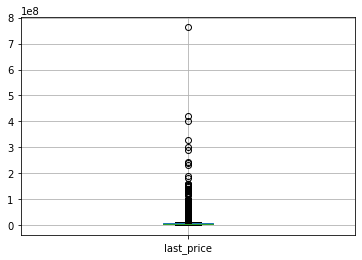

In [69]:
data.boxplot('last_price')

In [70]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Рассмотрим левую сторону распределения (нижние значения)

Минимальное значение 1.219000e+04 выглядит странно. 

In [71]:
data.query('last_price == 1.219000e+04')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,NaN,8.0


Заменим на медианное значение.

In [72]:
median = data['last_price'].median()

In [73]:
median

4650000.0

In [74]:
data.loc[data.query('last_price == 1.219000e+04').index, 'last_price'] = median

In [75]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541744e+06
std      1.088694e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [76]:
data.query('last_price <= 1.219000e+04')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Рассмотрим столбец last_price

<AxesSubplot:>

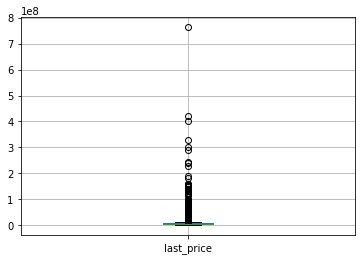

In [77]:
data.boxplot('last_price')

Здесь мы видим выбивающееся значение сверху.

In [78]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541744e+06
std      1.088694e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [79]:
data[data['last_price'] > 6.8e+07].shape[0] / data.shape[0]

0.0032490822397569516

Удалим данные с ценой больше 6.8e+07, что составляет примерно 0.3% выборки

In [80]:
idx = data[data['last_price'] > 6.8e+07].index.tolist()
data.drop(idx, inplace=True)
data.reset_index(drop=True, inplace=True)

<AxesSubplot:>

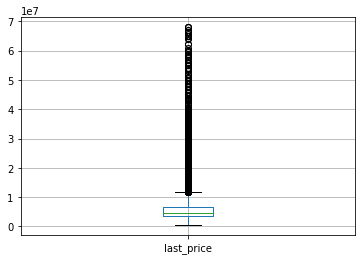

In [81]:
data.boxplot('last_price')

<AxesSubplot:>

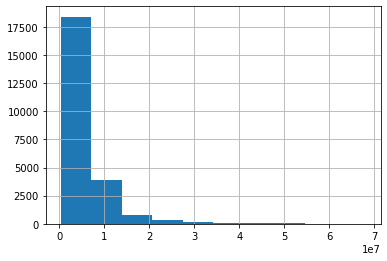

In [82]:
data['last_price'].hist()

Рассмотрим столбец с количеством комнат

<AxesSubplot:>

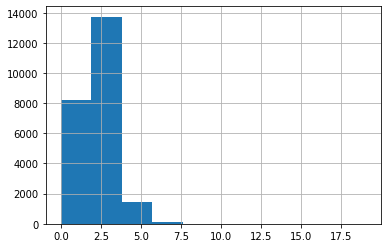

In [83]:
data['rooms'].hist()

In [84]:
data['rooms'].value_counts()

1     8047
2     7938
3     5797
4     1161
5      307
0      196
6       97
7       52
8       10
9        7
10       3
11       2
14       2
15       1
19       1
16       1
Name: rooms, dtype: int64

<AxesSubplot:>

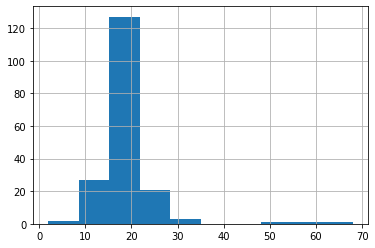

In [85]:
data[data['rooms'] == 0]['living_area'].hist()

<div class="alert alert-info">
<b>v1 Комментарий студента:</b>
<br>Итак, мы видим, что в объявлениях, указано количество комнат 0, площади квартир небольшие, поэтому заменим 0 на 1.
</div>

In [86]:
idx = data[data['rooms'] == 0].index.tolist()

In [87]:
data.loc[idx, 'rooms'] = 1

In [88]:
data['rooms'].value_counts()

1     8243
2     7938
3     5797
4     1161
5      307
6       97
7       52
8       10
9        7
10       3
11       2
14       2
15       1
19       1
16       1
Name: rooms, dtype: int64

In [89]:
data['rooms'].value_counts()

1     8243
2     7938
3     5797
4     1161
5      307
6       97
7       52
8       10
9        7
10       3
11       2
14       2
15       1
19       1
16       1
Name: rooms, dtype: int64

<div class="alert alert-info">
<b>v1 Комментарий студента:</b>
<br>Рассмотрим какую долю составляют квартиры с количеством комнат больше 6
</div>

In [90]:
data['rooms'].value_counts().loc[6:].sum() / data.shape[0]

0.007450681568029803

<div class="alert alert-info">
<b>v1 Комментарий студента:</b>
<br>Итак, такие данные составляют менее 1 %, поэтому можно их удалить
</div>

In [91]:
idx = data[data['rooms'] >= 6].index.tolist()
data.drop(idx, axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)

In [92]:
data['rooms'].value_counts()

1    8243
2    7938
3    5797
4    1161
5     307
Name: rooms, dtype: int64

Рассмотрим столбец с общей площадью

<AxesSubplot:>

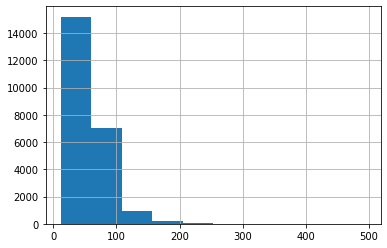

In [93]:
data['total_area'].hist()

<AxesSubplot:>

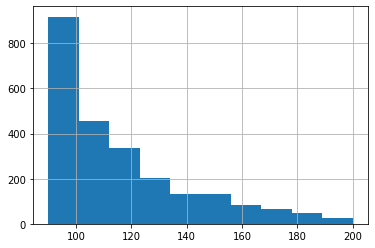

In [94]:
data['total_area'].hist(range=(90, 200))

Рассмотрим, какую долю составляют квартиры с общей площадью более 180 квадратных метров

In [95]:
data[data['total_area'] > 180].shape[0] / data.shape[0]

0.005715260598822827

Квартиры с общей площадью более 180 квадратных метра составляют около половины процента от всех данных. Удалим. 

In [96]:
idx = data[data['total_area'] > 180].index.tolist()
data.drop(idx, axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)

<AxesSubplot:>

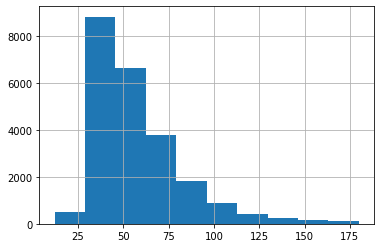

In [97]:
data['total_area'].hist()

- цена одного квадратного метра

In [98]:
data['one_square_meter_price'] = data['last_price'] / data['total_area']

- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

In [99]:
data['weekday_exposition'] = data['first_day_exposition'].apply(lambda x: pd.to_datetime(x).weekday())

- месяц публикации объявления

In [100]:
data['month_exposition'] = data['first_day_exposition'].apply(lambda x: pd.to_datetime(x).month)

- год публикации объявления

In [101]:
data['year_exposition'] = data['first_day_exposition'].apply(lambda x: pd.to_datetime(x).year)

- тип этажа квартиры (значения — «‎первый», «последний», «другой»);

In [102]:
data['floor_type'] = 'другой'

In [103]:
for i in range(data.shape[0]):
    current_floor = data.loc[i, 'floor']
    total_floors = data.loc[i, 'floors_total']
    if pd.isna(current_floor) or pd.isna(total_floors):
        continue
    if current_floor == 1:
        data.loc[i, 'floor_type'] = 'первый'
    elif current_floor == total_floors:
        data.loc[i, 'floor_type'] = 'последний'

- расстояние до центра города в километрах 

In [104]:
data['round_kilometers_cityCenters_nearest'] = round(data['cityCenters_nearest'] / 1000)

### Исследовательский анализ данных

- общая площадь

<AxesSubplot:>

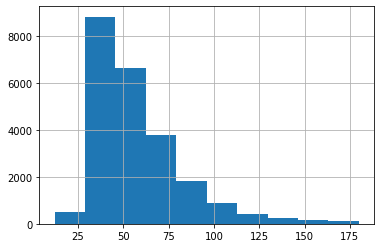

In [105]:
data['total_area'].hist()

In [106]:
data['total_area'].describe()

count    23312.000000
mean        57.428352
std         24.910631
min         12.000000
25%         40.000000
50%         51.400000
75%         68.000000
max        180.000000
Name: total_area, dtype: float64

<AxesSubplot:>

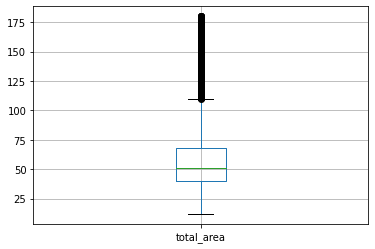

In [107]:
data.boxplot('total_area')

Мы видим гистограмму, смещенную влево. Действительно, в реальной жизни намного больше квартир с небольшой площадью, чем с большой. Среднее значение площади 60 квадратных метров. 50% значений площади располагаются между 40 и 69 м^2. Значения выше 200 м^2 выглядят как выбросы, хотя это могут быть особняки.

- жилая площадь

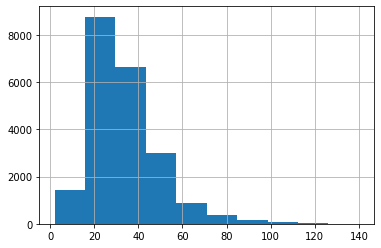

In [108]:
data['living_area'].hist();

In [109]:
data['living_area'].describe()

count    21452.000000
mean        32.787313
std         16.340411
min          2.000000
25%         18.500000
50%         30.000000
75%         42.000000
max        140.000000
Name: living_area, dtype: float64

<AxesSubplot:>

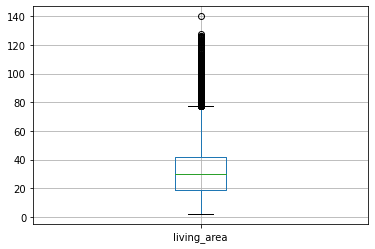

In [110]:
data.boxplot('living_area')

Итак, мы видим, что максимальное значение жилой площади ~410 м^2, тогда как максимальное значение общей площади 900 м^2. 
Это выглядит странным. Вероятно, это выброс. Среднее значение жилой площади 34 м^2, 50% значений площади располагаются между 18,6 и 42,3 м^2. Минимальное значение жилой площади 2 м^2. Вероятно, здесь закралась ошибка.

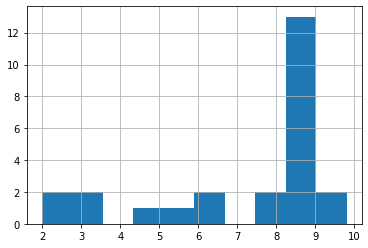

In [111]:
data[data['living_area'] < 10]['living_area'].hist();

Удалим выбросы 140 м^2 и менее 8 м^2

In [112]:
data.query('living_area == 2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_meter_price,weekday_exposition,month_exposition,year_exposition,floor_type,round_kilometers_cityCenters_nearest
13678,20,6350000.0,52.0,2018-02-06T00:00:00,2,3.00,6,2.0,2,False,False,...,0,NaN,1,1012.0,91.0,122115.384615,1,2,2018,другой,7.0
21410,0,2330000.0,23.0,2018-01-01T00:00:00,1,2.65,24,2.0,22,False,True,...,0,NaN,0,NaN,66.0,101304.347826,0,1,2018,другой,NaN


In [113]:
cond_1 = data['living_area'] >= 140
cond_2 = data['living_area'] <= 8

In [114]:
data[cond_1 | cond_2].shape[0] / data.shape[0]

0.00047185998627316403

In [115]:
data[data['living_area'] >= 140]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_meter_price,weekday_exposition,month_exposition,year_exposition,floor_type,round_kilometers_cityCenters_nearest
13498,14,20300000.0,170.0,2017-11-26T00:00:00,3,2.65,6,140.0,4,False,False,...,3,388.0,1,189.0,104.0,119411.764706,6,11,2017,другой,5.0


In [116]:
idx = data[cond_1 | cond_2].index.tolist()
data.drop(idx, axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)

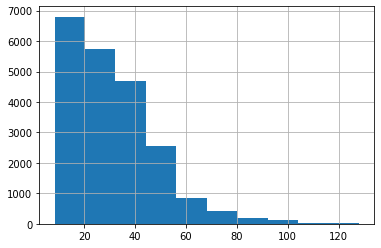

In [117]:
data['living_area'].hist();

- площадь кухни;

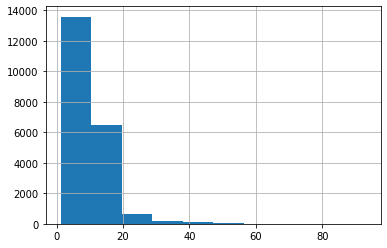

In [118]:
data['kitchen_area'].hist();

In [119]:
data['kitchen_area'].describe()

count    21069.000000
mean        10.316782
std          5.230029
min          1.300000
25%          7.000000
50%          9.000000
75%         11.800000
max         93.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

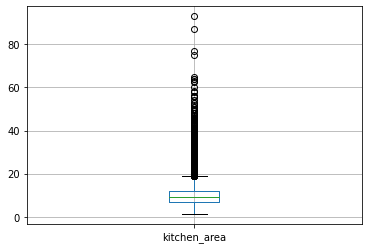

In [120]:
data.boxplot('kitchen_area')

Мы видим гистограмму, смещенную влево, что соответствует реальной жизни. Среднее значение площади кухни 10 квадратных метров.
50% значений площади располагаются между 7 и 12 м^2. Минимальное значение 1,3 м^2 выглядит как выброс.

<AxesSubplot:>

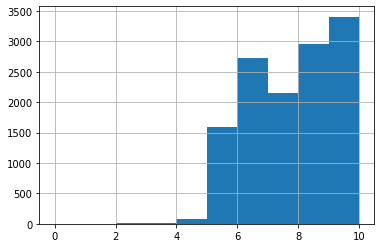

In [121]:
data['kitchen_area'].hist(range=(0, 10))

In [122]:
data[data['kitchen_area'] <= 4].shape[0] / data.shape[0]

0.002317497103128621

In [123]:
data.query('kitchen_area == 1.3')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_meter_price,weekday_exposition,month_exposition,year_exposition,floor_type,round_kilometers_cityCenters_nearest
19888,7,4250000.0,28.5,2019-05-01T00:00:00,1,2.8,14,19.5,10,False,False,...,0,NaN,0,NaN,NaN,149122.807018,2,5,2019,другой,13.0


Удалим выбросы менее 4 квадратных метров

In [124]:
idx = data[data['kitchen_area'] <= 4].index.tolist()
data.drop(idx, axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)

<AxesSubplot:>

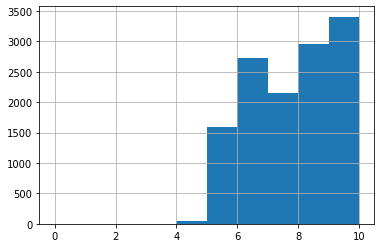

In [125]:
data['kitchen_area'].hist(range=(0, 10))

<AxesSubplot:>

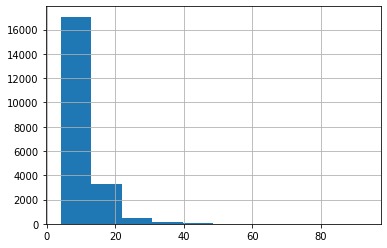

In [126]:
data['kitchen_area'].hist()

In [127]:
data['kitchen_area'].describe()

count    21015.000000
mean        10.334589
std          5.224776
min          4.100000
25%          7.000000
50%          9.000000
75%         11.850000
max         93.000000
Name: kitchen_area, dtype: float64

Мы видим гистограмму, смещенную влево, что соответствует реальной жизни. Среднее значение площади кухни 10 квадратных метров.
50% значений площади располагаются между 7 и 12 м^2

- цена объекта;

<AxesSubplot:>

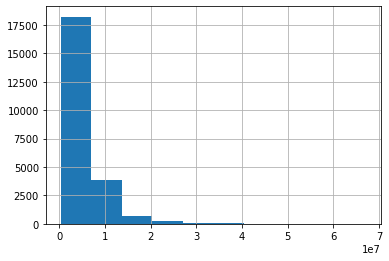

In [128]:
data['last_price'].hist()

In [129]:
data['last_price'].describe()

count    2.324700e+04
mean     5.850692e+06
std      4.816249e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.600000e+06
max      6.700000e+07
Name: last_price, dtype: float64

<AxesSubplot:>

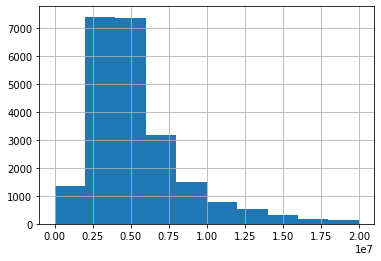

In [130]:
data['last_price'].hist(range=(0, 0.2*1e8))

Разделим все значения на 1 млн

In [131]:
data['last_price'] = data['last_price'] / 1000000

<AxesSubplot:>

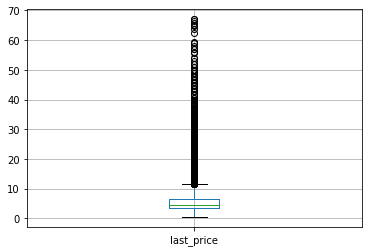

In [132]:
data.boxplot('last_price')

In [133]:
data['last_price'].median()

4.6

Медианное значение цены 4650000, а среднее 6.541744e+06. 50 % значений находятся между значениями 3.400000e+06 и 6.800000e+06. 
Минимальное значение 4.300000e+05 выглядит подозрительным.

In [134]:
data.query('last_price == 4.300000e+05')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_meter_price,weekday_exposition,month_exposition,year_exposition,floor_type,round_kilometers_cityCenters_nearest


In [135]:
data['last_price'].describe()

count    23247.000000
mean         5.850692
std          4.816249
min          0.430000
25%          3.400000
50%          4.600000
75%          6.600000
max         67.000000
Name: last_price, dtype: float64

In [136]:
data['last_price'].median()

4.6

Медианное значение цены 4.6 млн, а среднее 5.8 млн. 50 % значений находятся между значениями 3.4 и 6.6. Минимальное значение 0.43 выглядит подозрительным.

<AxesSubplot:>

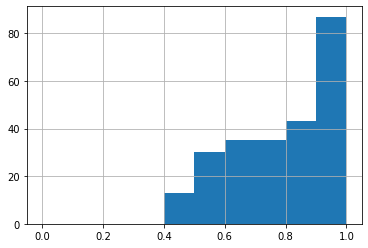

In [137]:
data['last_price'].hist(range=(0, 1))

Рассмотрим, какую долю составляют квартиры со стоимостью менее 1 млн

In [138]:
data[data['last_price'] < 1].shape[0] / data.shape[0]

0.009592635608895771

Квартиры со стоимостью менее 1 млн составляют около процента. Удалим.

In [139]:
idx = data[data['last_price'] < 1].index.tolist()
data.drop(idx, axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)

In [140]:
data['last_price'].describe()

count    23024.000000
mean         5.899886
std          4.813357
min          1.000000
25%          3.450000
50%          4.600000
75%          6.650000
max         67.000000
Name: last_price, dtype: float64

In [141]:
data['last_price'].median()

4.6

<AxesSubplot:>

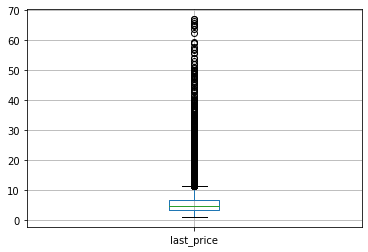

In [142]:
data.boxplot('last_price')

медианное значение цены 4.6 млн, а среднее 5.8 млн. 50 % значений находятся между значениями 3.4 и 6.6 млн. 
Среднее больше медианного из-за того, что в выборке присутствует небольшое количество дшорогих квартир. 

- количество комнат;

<AxesSubplot:>

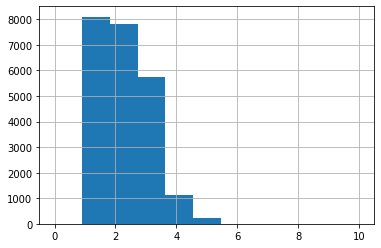

In [143]:
data['rooms'].hist(bins=11, range=(0,10))

<AxesSubplot:>

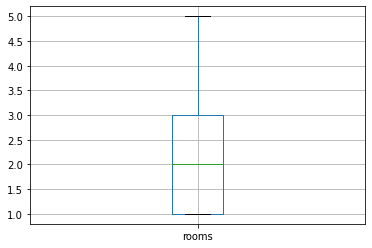

In [144]:
data.boxplot('rooms')

In [145]:
data['rooms'].describe()

count    23024.000000
mean         2.025929
std          0.942731
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

In [146]:
data['rooms'].median()

2.0

итак, больше всего обхявлений с 1 и 2 комнатными квартирами.

- высота потолков

<AxesSubplot:>

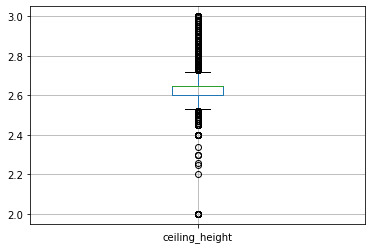

In [147]:
data.boxplot('ceiling_height')

In [148]:
data['ceiling_height'].describe()

count    23024.000000
mean         2.651717
std          0.113835
min          2.000000
25%          2.600000
50%          2.650000
75%          2.650000
max          3.000000
Name: ceiling_height, dtype: float64

Итак, средняя высота потолков ~2,65 метров, максимальная 3 метра, минимальная 2 метра. Эти значения были рассмотрены ранее.

- этаж квартиры;

<AxesSubplot:>

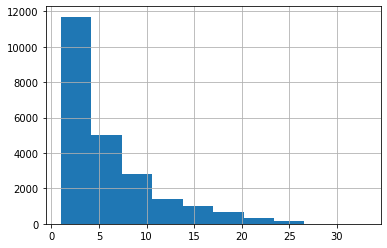

In [149]:
data['floor'].hist()

<AxesSubplot:>

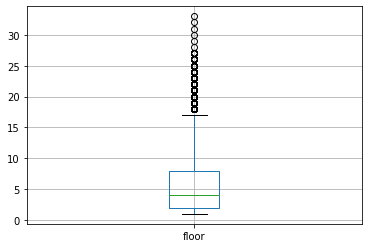

In [150]:
data.boxplot('floor')

In [151]:
data['floor'].describe()

count    23024.000000
mean         5.940453
std          4.905347
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [152]:
data['floor'].median()

4.0

Самое популярное (медианное) значение - 4, то есть больше всего объявлений о продаже квартир на 4 этаже. 
50 % значений лежат между 2 и 8. Чем выше этаж, тем меньше объявлений о продаже.

- тип этажа квартиры («первый», «последний», «другой»);

In [153]:
data['floor_type'].value_counts()

другой       17086
последний     3144
первый        2794
Name: floor_type, dtype: int64

In [154]:
2917 / data.shape[0]

0.1266938846421126

Меньше всего объявлений о продаже квартир на последнем этаже, на первом продается ~12 %. В основном квартиры продаются между 1 и последним этажами.

- общее количество этажей в доме;

<AxesSubplot:>

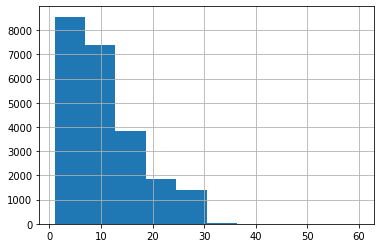

In [155]:
data['floors_total'].hist()

In [156]:
data['floors_total'].describe()

count    23024.000000
mean        10.767981
std          6.618856
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [157]:
data.dtypes

total_images                              int64
last_price                              float64
total_area                              float64
first_day_exposition                     object
rooms                                     int64
ceiling_height                          float64
floors_total                              int32
living_area                             float64
floor                                     int64
is_apartment                               bool
studio                                     bool
open_plan                                  bool
kitchen_area                            float64
balcony                                   int32
locality_name                            object
airports_nearest                        float64
cityCenters_nearest                     float64
parks_around3000                          int32
parks_nearest                           float64
ponds_around3000                          int32
ponds_nearest                           

In [158]:
data['floors_total'] = data['floors_total'].map(int)

In [159]:
data.dtypes

total_images                              int64
last_price                              float64
total_area                              float64
first_day_exposition                     object
rooms                                     int64
ceiling_height                          float64
floors_total                              int64
living_area                             float64
floor                                     int64
is_apartment                               bool
studio                                     bool
open_plan                                  bool
kitchen_area                            float64
balcony                                   int32
locality_name                            object
airports_nearest                        float64
cityCenters_nearest                     float64
parks_around3000                          int32
parks_nearest                           float64
ponds_around3000                          int32
ponds_nearest                           

<AxesSubplot:>

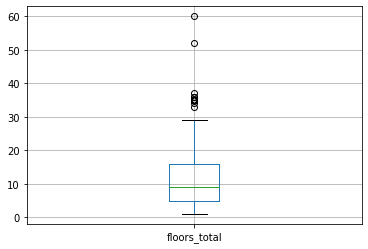

In [160]:
data.boxplot('floors_total')

In [161]:
data['floors_total'].describe()

count    23024.000000
mean        10.767981
std          6.618856
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [162]:
data['floors_total'].median()

9.0

Итак, большинство объявлений с квартирами в 9-ти этажных домах. 50% значений лежат между 6 и 14. 

- расстояние до центра города в метрах;

<AxesSubplot:>

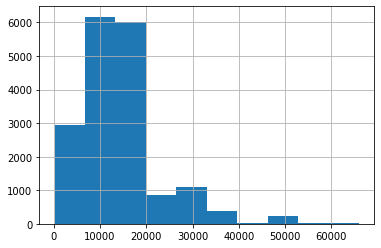

In [163]:
data['cityCenters_nearest'].hist()

In [164]:
data['cityCenters_nearest'].describe()

count    17749.000000
mean     14347.441828
std       8570.798329
min        181.000000
25%       9550.000000
50%      13205.000000
75%      16379.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [165]:
data['cityCenters_nearest'].median()

13205.0

Среднее значение расстояния от центра порядка 13 км. 50% значений находятся между ~9 и ~16 километрами. Распределение нельзя назвать нормальным.

- расстояние до ближайшего аэропорта;

<AxesSubplot:>

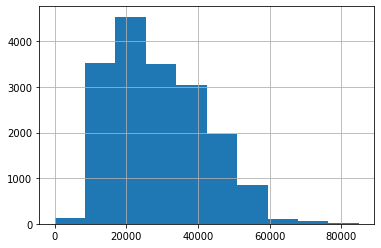

In [166]:
data['airports_nearest'].hist()

In [167]:
data['airports_nearest'].describe()

count    17729.000000
mean     28851.013368
std      12701.312526
min          0.000000
25%      18490.000000
50%      26890.000000
75%      37407.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [168]:
data['airports_nearest'].median()

26890.0

Среднее значение расстояния до ближайшего аэропорта порядка 28 км. 50% значений лежат между ~18 И ~37 км.

- расстояние до ближайшего парка;

<AxesSubplot:>

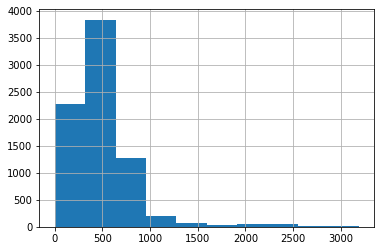

In [169]:
data['parks_nearest'].hist()

In [170]:
data['parks_nearest'].describe()

count    7803.000000
mean      492.376650
std       342.688407
min         1.000000
25%       288.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Среднее значение расстояния до ближайшего парка порядка 490 метров. 50% значений находятся между ~288 и ~614 метрами. 
У большинства квартир в радиусе 3 км есть хотя бы 1 парк. Странное значение 1 метр.

<AxesSubplot:>

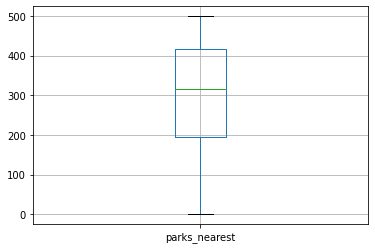

In [171]:
data[data['parks_nearest'] < 500].boxplot('parks_nearest')

- день и месяц публикации объявления.

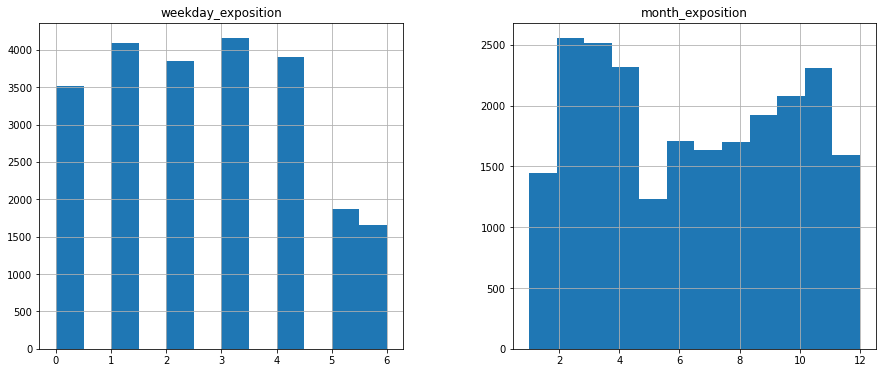

In [172]:
data[['weekday_exposition', 'month_exposition']].hist(figsize=(15, 6), bins=12);

In [173]:
data['weekday_exposition'].value_counts()

3    4155
1    4085
4    3901
2    3847
0    3516
5    1869
6    1651
Name: weekday_exposition, dtype: int64

In [174]:
data['month_exposition'].value_counts()

2     2555
3     2518
4     2317
11    2312
10    2081
9     1924
6     1706
8     1698
7     1634
12    1593
1     1450
5     1236
Name: month_exposition, dtype: int64

Итак, большинство объявлений публикуют в середине недели - в среду, меньше всего на выходных. Большинство объявлений публикуют после Нового года - в феврале, далее количество объявлений уменьшается (меньше всего в мае). Начиная с июня, вновь наблюдается рост публикаций.

Изучим, как быстро продавались квартиры (столбец days_exposition)

<AxesSubplot:>

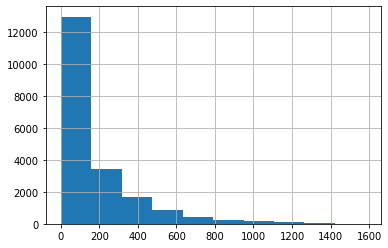

In [175]:
data['days_exposition'].hist()

In [176]:
data['days_exposition'].describe()

count    19992.000000
mean       179.496399
std        218.261342
min          1.000000
25%         44.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [177]:
data['days_exposition'].median()

95.0

Итак, самое популярное значение количества дней, сколько было размещено каждое объявление, - 95, то есть порядка 3 месяцев.
Минимально - 1 день (вероятно либо очень выгодное предложение, на которое было много откликов, либо продавец сам его 
снял с публикации), максимальное значение -  1580 дней (~4,3 года). 50% значений лежат между 45 днями и 232 днями. Меньше 45 дней - быстрые продажи, больше 232 дней - долгие продажи.

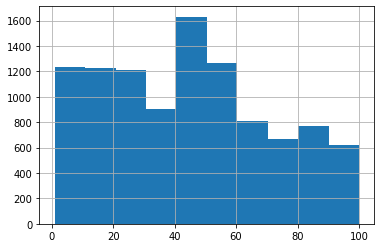

In [178]:
data[data['days_exposition'] <=100]['days_exposition'].hist();

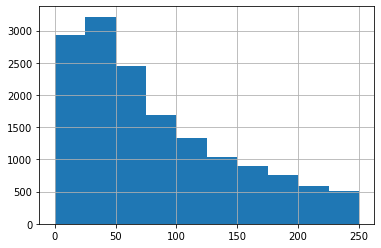

In [179]:
data['days_exposition'].hist(range=(0, 250));

 итак, больше продается квартир за 1.5 месяца

In [180]:
1580/365 

4.328767123287672

Изучим, зависит ли цена от:

- общей площади;

In [181]:
data[['last_price', 'total_area']].corr()

,last_price,total_area
last_price,1.000000,0.742649
total_area,0.742649,1.000000


Коэффициент корреляции цены и общей площади 0.74. Это значит, что линейная зависимость присутствует.

- жилой площади;

In [182]:
data[['last_price', 'living_area']].corr()

,last_price,living_area
last_price,1.000000,0.623681
living_area,0.623681,1.000000


 цены и жилой площади 0.62. Это значит, что линейная зависимость слабая, но есть.

- площади кухни;

In [183]:
data[['last_price', 'kitchen_area']].corr()

,last_price,kitchen_area
last_price,1.000000,0.576996
kitchen_area,0.576996,1.000000


Коэффициент корреляции цены и площади кухни 0.58. Это значит, что линейная зависимость слабая.

- количества комнат;

In [184]:
data[['last_price', 'rooms']].corr()

,last_price,rooms
last_price,1.000000,0.432504
rooms,0.432504,1.000000


Коэффициент корреляции цены и количества комнат 0.43. Это значит, что линейной зависимости нет

- этажа, на котором расположена квартира (первый, последний, другой);

In [185]:
data[data['floor_type'] == 'первый']['last_price'].describe()

count    2794.000000
mean        4.633647
std         3.370745
min         1.000000
25%         2.900000
50%         3.950000
75%         5.400000
max        51.000000
Name: last_price, dtype: float64

In [186]:
data[data['floor_type'] == 'последний']['last_price'].describe()

count    3144.000000
mean        5.623357
std         4.799523
min         1.000000
25%         3.068199
50%         4.300000
75%         6.500000
max        67.000000
Name: last_price, dtype: float64

In [187]:
data[data['floor_type'] == 'другой']['last_price'].describe()

count    17086.000000
mean         6.157833
std          4.978237
min          1.000000
25%          3.600000
50%          4.800000
75%          6.900000
max         67.000000
Name: last_price, dtype: float64

In [188]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='median')

,last_price
floor_type,
другой,4.80
первый,3.95
последний,4.30


In [189]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='mean')

,last_price
floor_type,
другой,6.157833
первый,4.633647
последний,5.623357


Итак, средняя цена на квартиры на первом этаже ниже чем на других. Средняя и медианная цена квартир 
на последнем этаже немного ниже чем на других этажах. Это соответствует действительности, так как квартиры на первых 
этажах имеют ряд недостатков и оттого хуже покупаются.

- даты размещения (день недели, месяц, год).

<AxesSubplot:xlabel='weekday_exposition'>

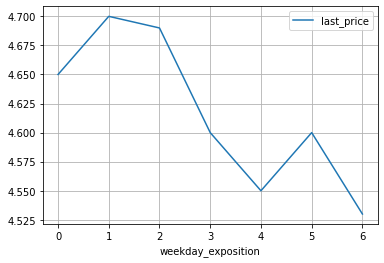

In [190]:
data.pivot_table(index='weekday_exposition', values='last_price', aggfunc='median').plot(grid=True)

 Итак, квартиры во вторник чаще всего продаются по наибольшей цене, далее цена снижается. Также наблюдается небольшой пик в субботу.

<AxesSubplot:xlabel='month_exposition'>

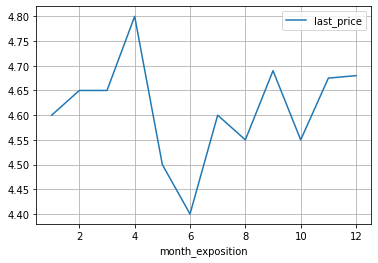

In [191]:
data.pivot_table(index='month_exposition', values='last_price', aggfunc='median').plot(grid=True)

Самые высокие цены на квартиры в апреле, вероятно это связано с наибольшим спросом. Самая наименьшая цена в июне. Выгодней всего искать квартиры в июне.

<AxesSubplot:xlabel='year_exposition'>

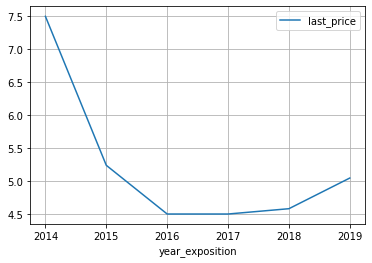

In [192]:
data.pivot_table(index='year_exposition', values='last_price', aggfunc='median').plot(grid=True)

Самые высокие цены были в 2014 году, затем они стали снижаться. После 2017 года цены стали вновь расти.

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

Найдем 10 населенных пунктов с наибольшим числом объявлений

In [193]:
data.groupby(['locality_name'])['locality_name'].count().sort_values(ascending=False)[:10]

locality_name
Санкт-Петербург      15312
поселок Мурино         551
поселок Шушары         438
Всеволожск             397
Пушкин                 361
Колпино                337
поселок Парголово      326
Гатчина                306
деревня Кудрово        299
Выборг                 230
Name: locality_name, dtype: int64

In [194]:
most_popular_places = data.groupby(['locality_name'])['locality_name'].count().sort_values(ascending=False)[:10].index.tolist()

Выберем объявления из этих 10 мест

In [195]:
adverts = data[data['locality_name'].isin(most_popular_places)].copy()

In [196]:
adverts.reset_index(drop=True, inplace=True)

In [197]:
adverts.pivot_table(index='locality_name', values='one_square_meter_price', aggfunc='mean')\
                                                    .sort_values(by='one_square_meter_price')

,one_square_meter_price
locality_name,
Выборг,58673.498341
Всеволожск,68719.287383
Гатчина,68935.194838
Колпино,75333.295801
поселок Шушары,78513.333916
поселок Мурино,85548.507459
поселок Парголово,90332.263023
деревня Кудрово,92473.547576
Пушкин,103092.514299


Рассмотрим 10 мест, в которых наибольшее число объявлений о продаже квартир. Из них: 
в Выборге самая маленькая цена квардратного метра,
а в Санкт-Питербурге самая высокая цена квадратного метра (соответствует реальности).

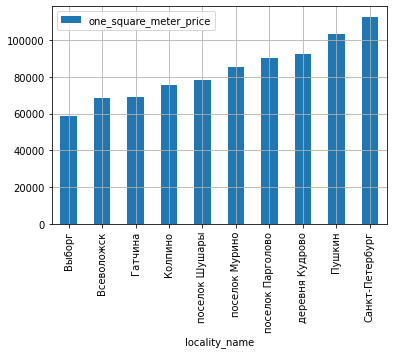

In [198]:
adverts.pivot_table(index='locality_name', values='one_square_meter_price', aggfunc='mean')\
                                                    .sort_values(by='one_square_meter_price').plot(kind='bar', grid=True);

Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. Опишим, как стоимость объектов зависит от расстояния до центра города.

In [199]:
st_petersberg_flats = data[data['locality_name'] == 'Санкт-Петербург'].copy()

In [200]:
st_petersberg_flats.reset_index(drop=True, inplace=True)

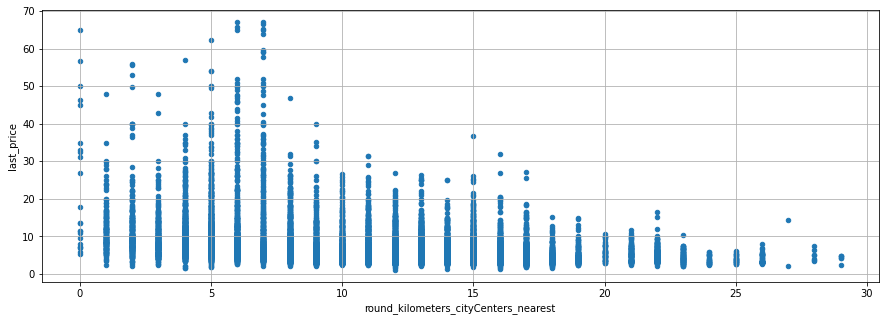

In [201]:
st_petersberg_flats.plot(x='round_kilometers_cityCenters_nearest', y='last_price', kind='scatter', grid=True,
                        figsize=(15,5));

Чем меньше расстояние до центра, тем выше цены, что логично. Дальше 7 км от центра цены заметно снижаются.

### Общий вывод

Итак, 
- намного больше квартир с небольшой площадью, чем с большой. Среднее значение площади 60 квадратных метров. 50% значений площади располагаются между 40 и 69 м^2
- среднее значение жилой площади 34 м^2, 50% значений площади располагаются между 18,6 и 42,3 м^2
- среднее значение площади кухни 10 квадратных метров.50% значений площади располагаются между 7 и 12 м^2.
- медианное значение цены 4650000, а среднее 6541744. 50 % значений находятся между значениями 3400000 и 6800000
- больше всего объявлений с 1 и 2 комнатными квартирами.
- больше всего объявлений о продаже квартир на 4 этаже. 50 % значений лежат между 2 и 8. Чем выше этаж, тем меньше объявлений о продаже.
- меньше всего объявлений о продаже квартир на последнем этаже, на первом продается ~12 %. В основном квартиры продаются между 1 и последним этажами.
- среднее значение расстояния от центра порядка 13 км. 50% значений находятся между ~9 b и ~16 километрами.
- среднее значение расстояния до ближайшего аэропорта порядка 28 км. 50% значений лежат между ~18,5 И ~37,3 км.
- среднее значение расстояния до ближайшего парка 490 метров. 50% значений находятся между ~288 и ~612 метрами. У большинства квартир в радиусе 3 км есть хотя бы 1 парк. 
- большинство объявлений публикуют в середине недели - в среду, меньше всего на выходных. Большинство объявлений публикуют после Нового года - в феврале, далее количество объявлений уменьшается (меньше всего в мае). Начиная с июня, вновь наблюдается рост публикаций.
- самое популярное значение количества дней, сколько было размещено каждое объявление, - 95, то есть порядка 3 месяцев. Минимально - 1 день (вероятно либо очень выгодное предложение, на которое было много откликов, либо продавец сам его снял с публикации), максимальное значение - 1580 дней (~4,3 года). 50% значений лежат между 45 днями и 232 днями. Меньше 45 дней - быстрые продажи, больше 232 дней - долгие продажи.
- линейная зависимость между ценой и другими параметрами не обнаружена.
- средняя цена на квартиры на первом этаже ниже чем на других. Средняя и медианная цена квартир на последнем этаже немного ниже чем на других этажах. Это соответствует действительности, так как квартиры на первых этажах имеют ряд недостатков и оттого хуже покупаются
- самые высокие цены на квартиры в апреле, вероятно это связано с наибольшим спросом. Самая наименьшая цена в июне. Выгодней всего искать квартиры в июне.
- самые высокие цены были в 2014 году, затем они стали снижаться. После 2017 года цены стали вновь расти.
- 10 мест, в которых наибольшее число объявлений о продаже квартир:  'Выборг', 'Всеволожск', 'Гатчина', 'Колпино', 'поселок Шушары','поселок Мурино', 'поселок Парголово', 'деревня Кудрово', 'Пушкин','Санкт-Петербург'
Из них: в Выборге самая маленькая цена квардратного метра, а в Санкт-Питербурге самая высокая цена квадратного метра (соответствует реальности). 
- чем меньше расстояние до центра, тем выше цены, что логично. Дальше 7 км от центра цены заметно снижаются.